# Thema
I roughly calibrated H spectrum in ./calibration_niihama<br>
However I couldn't cleary determin the lines, so I use Ne spectrum<br>

In [1]:
%pylab inline

import os
from os.path import join
import xarray as xr

Populating the interactive namespace from numpy and matplotlib


In [2]:
bpth = join(os.path.expanduser('~'), 'works', 'myLeprecon')
specpath = join(bpth, 'SpectrometerData', '20201001')

# Plot waterfall

I arranged all the data vertically.<br>
The red number on the left of the graph show the rotation of the moter. The horizontal axis of the graph is the horizontal pixel value of the each image.<br>
We can see from the graph that the images next to each other overlap about half.

### Hydrogen

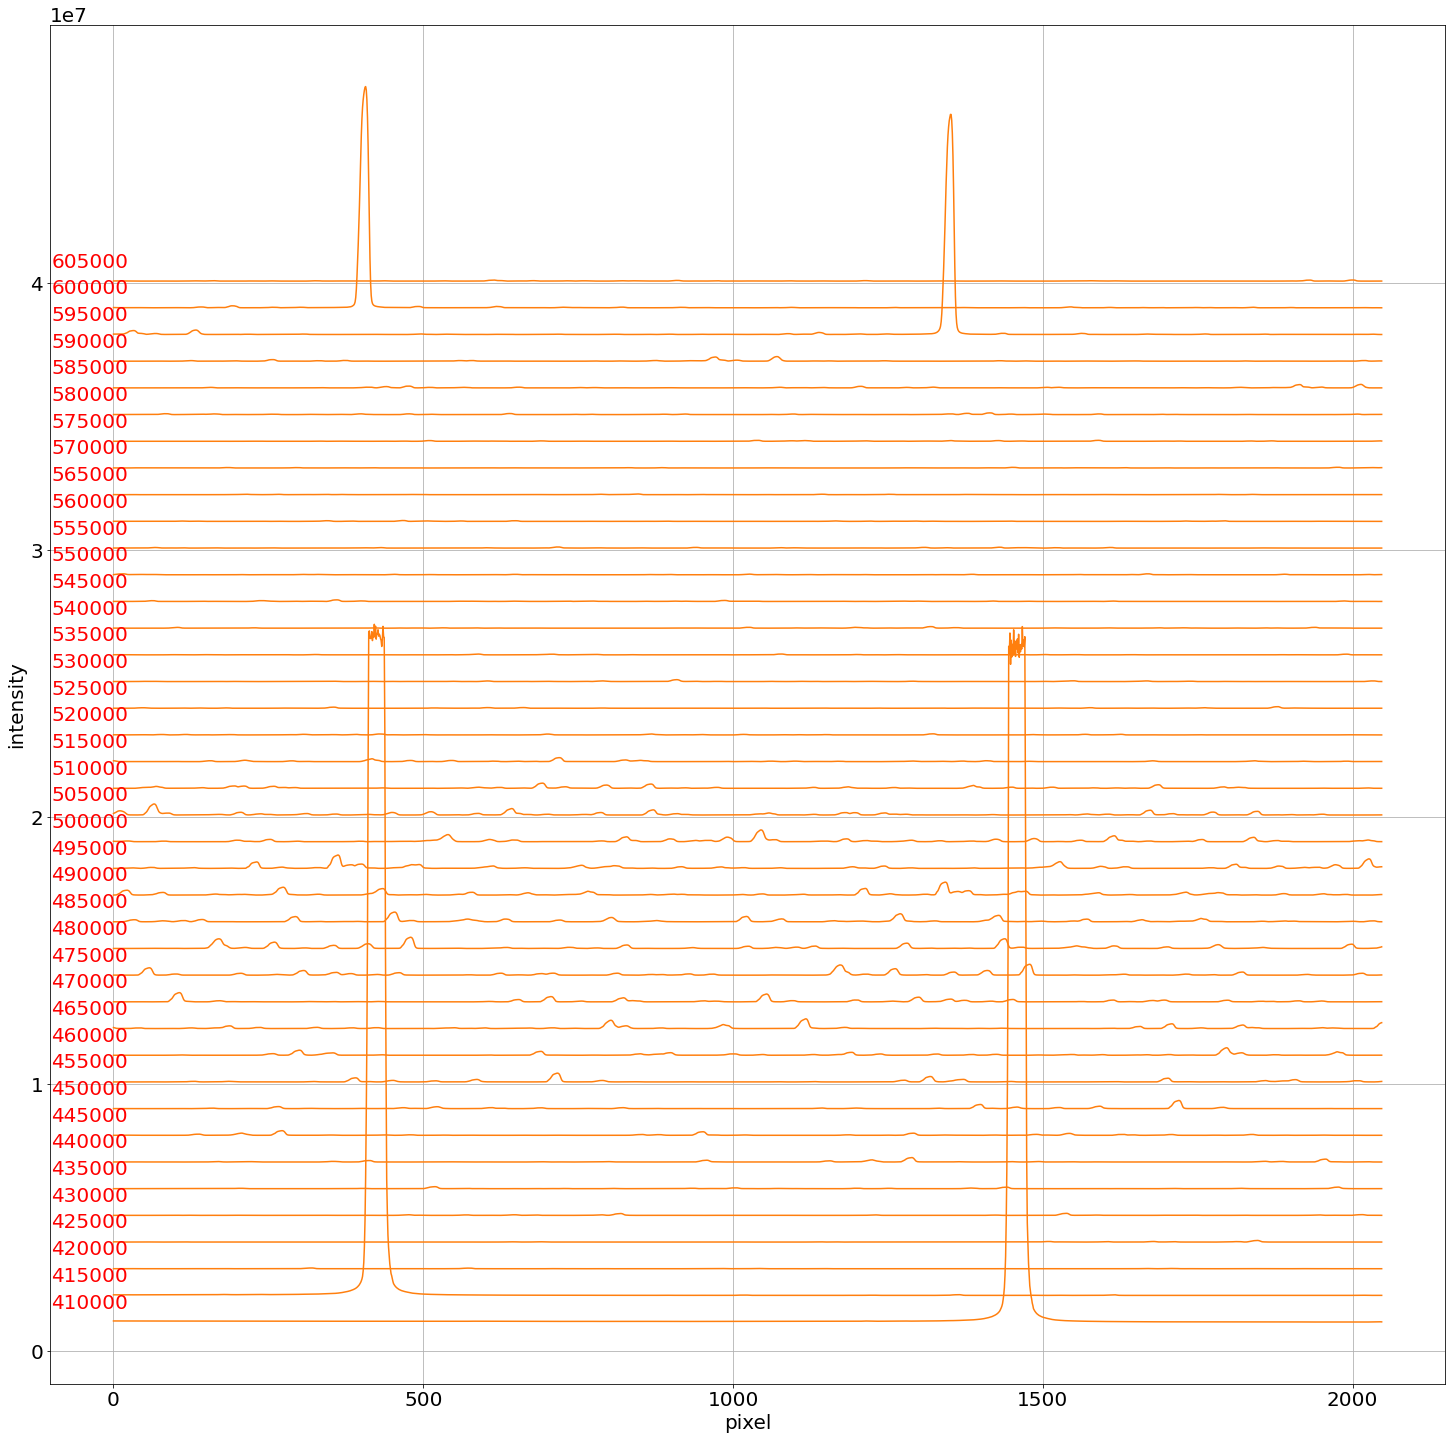

In [19]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

R = [f'H_{410000 + 5000 * i}.nc' for i in range(40)]
for i, fp in enumerate(R):
    image_data = xr.open_dataset(join(specpath, fp))

    plot(image_data.to_array()[0].sum(axis=0) + i * 1e6, f'C1')
         
[text(-100, 1.6e6 + 1e6 * i, t[2:-3], color='r') for i, t in enumerate(R)]
xlabel('pixel')
ylabel('intensity')
rcParams['font.size'] = 30
grid()

### Neon

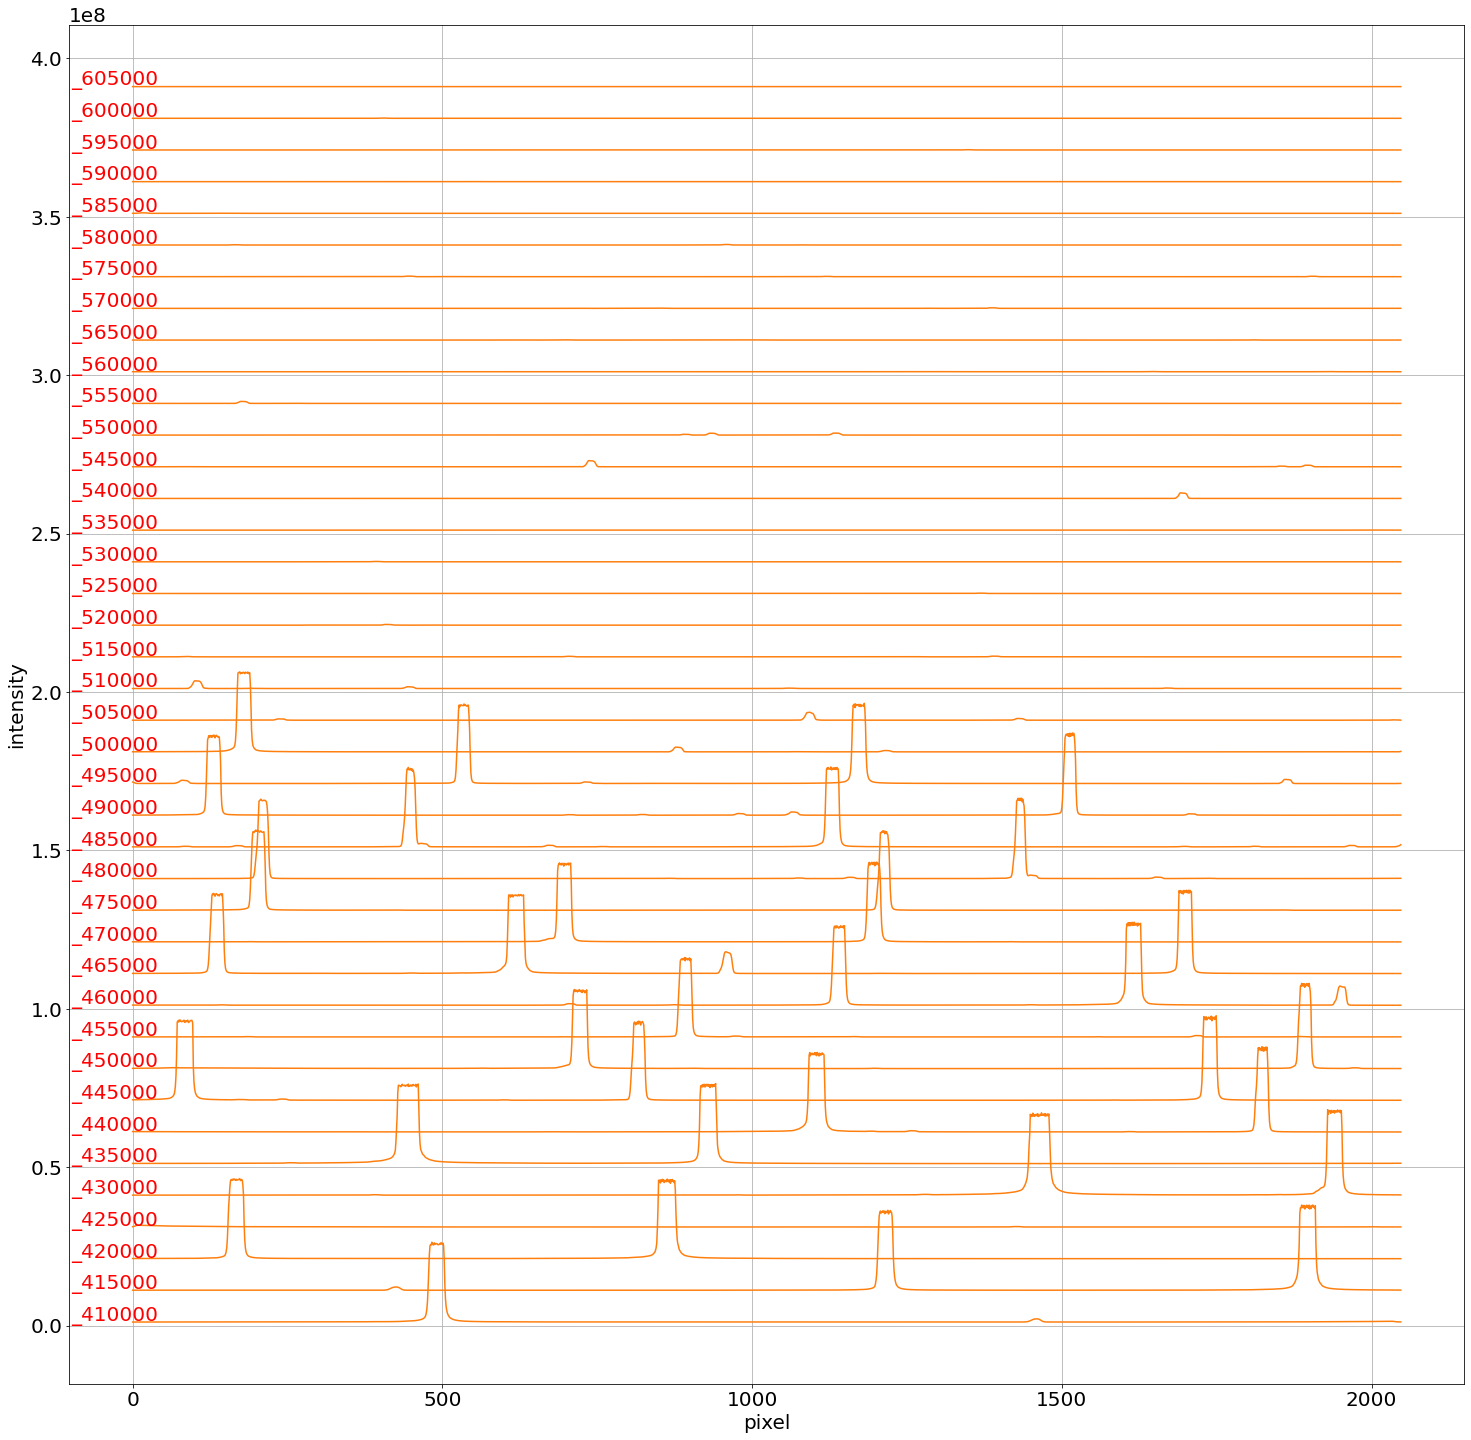

In [26]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

R = [f're-Ne_{410000 + 5000 * i}.nc' for i in range(40)]
for i, fp in enumerate(R):
    image_data = xr.open_dataset(join(specpath, fp))

    plot(image_data.to_array()[0].sum(axis=0) + i * 1e7, f'C1')
         
[text(-100, 1.6e6 + 1e7 * i, t[5:-3], color='r') for i, t in enumerate(R)]
xlabel('pixel')
ylabel('intensity')
grid()

# Overlap neighbours
### Neon

(1000.0, 2000.0)

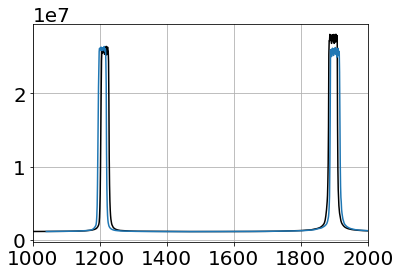

In [42]:
x = np.arange(2048)
fp = 're-Ne_415000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 're-Ne_420000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 1040, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000.0, 2000.0)

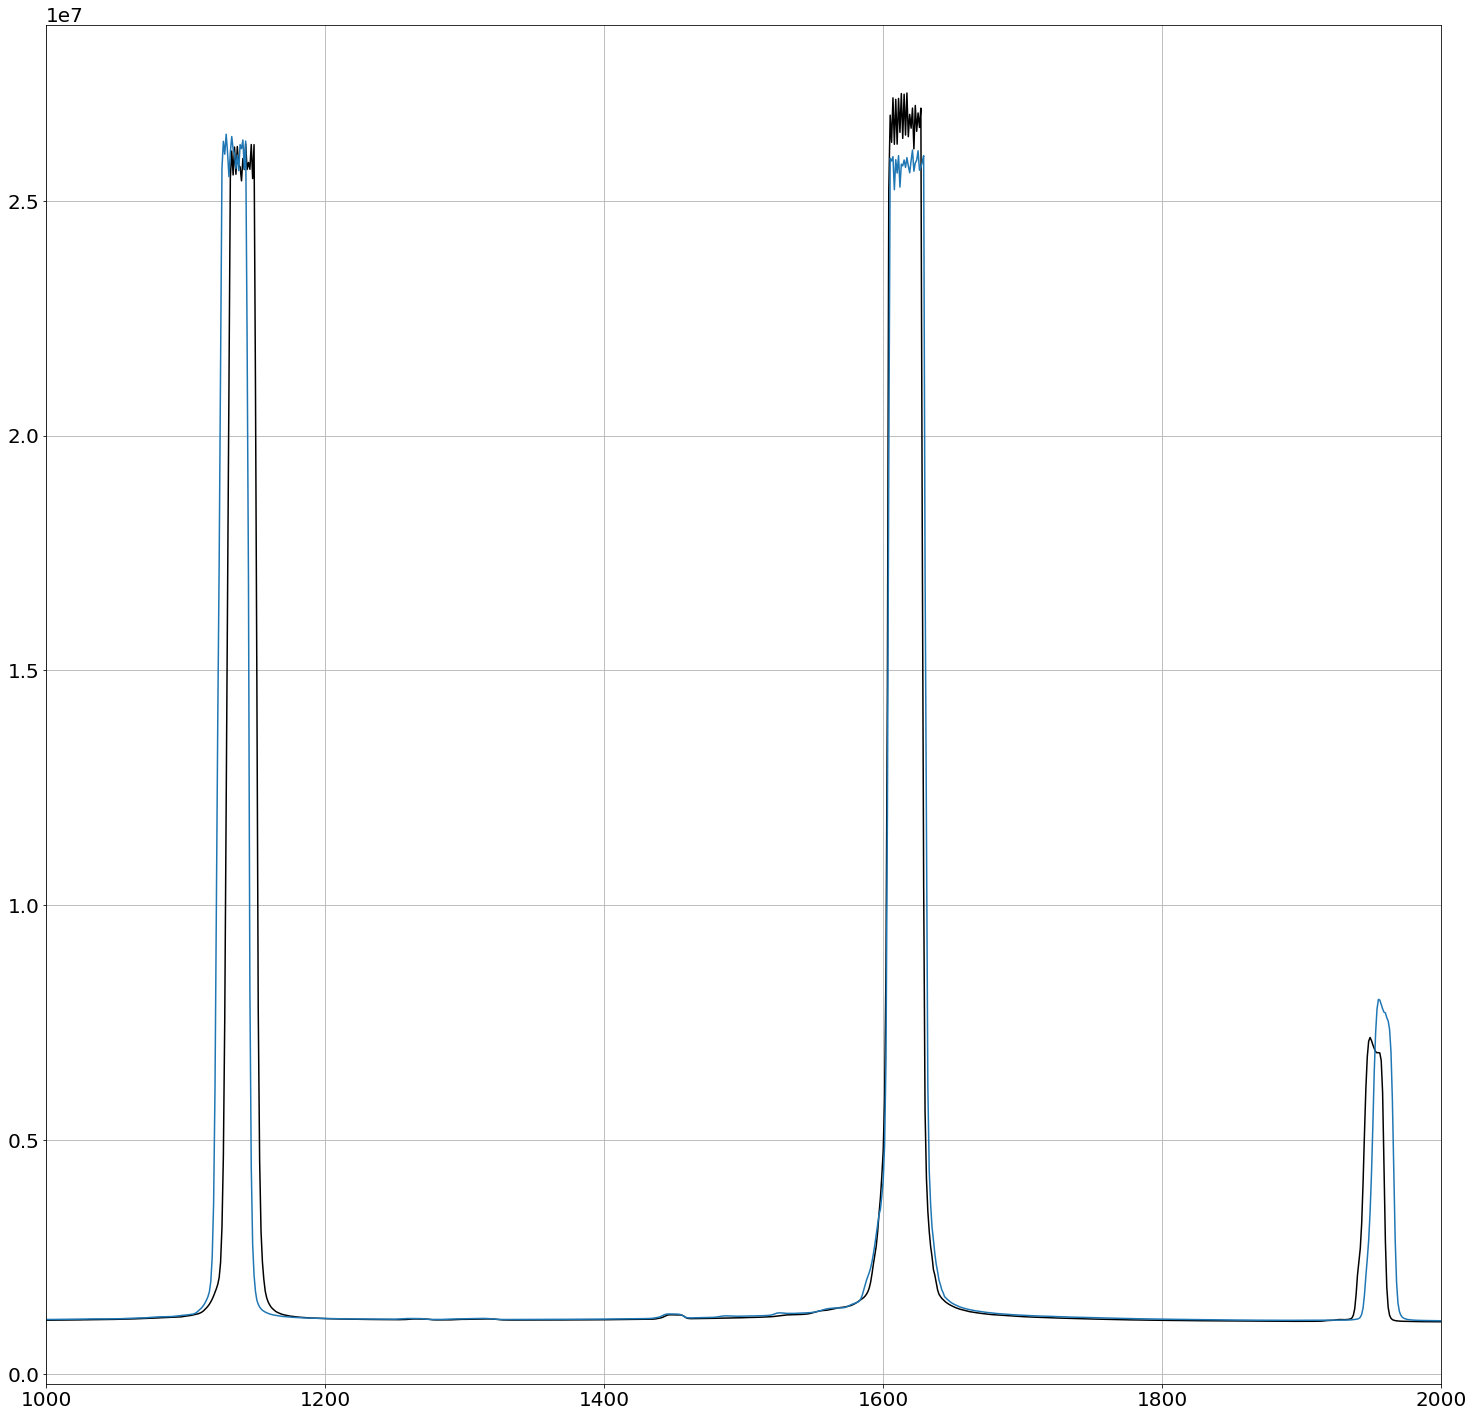

In [54]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 're-Ne_460000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 're-Ne_465000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 998, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

(1000.0, 2000.0)

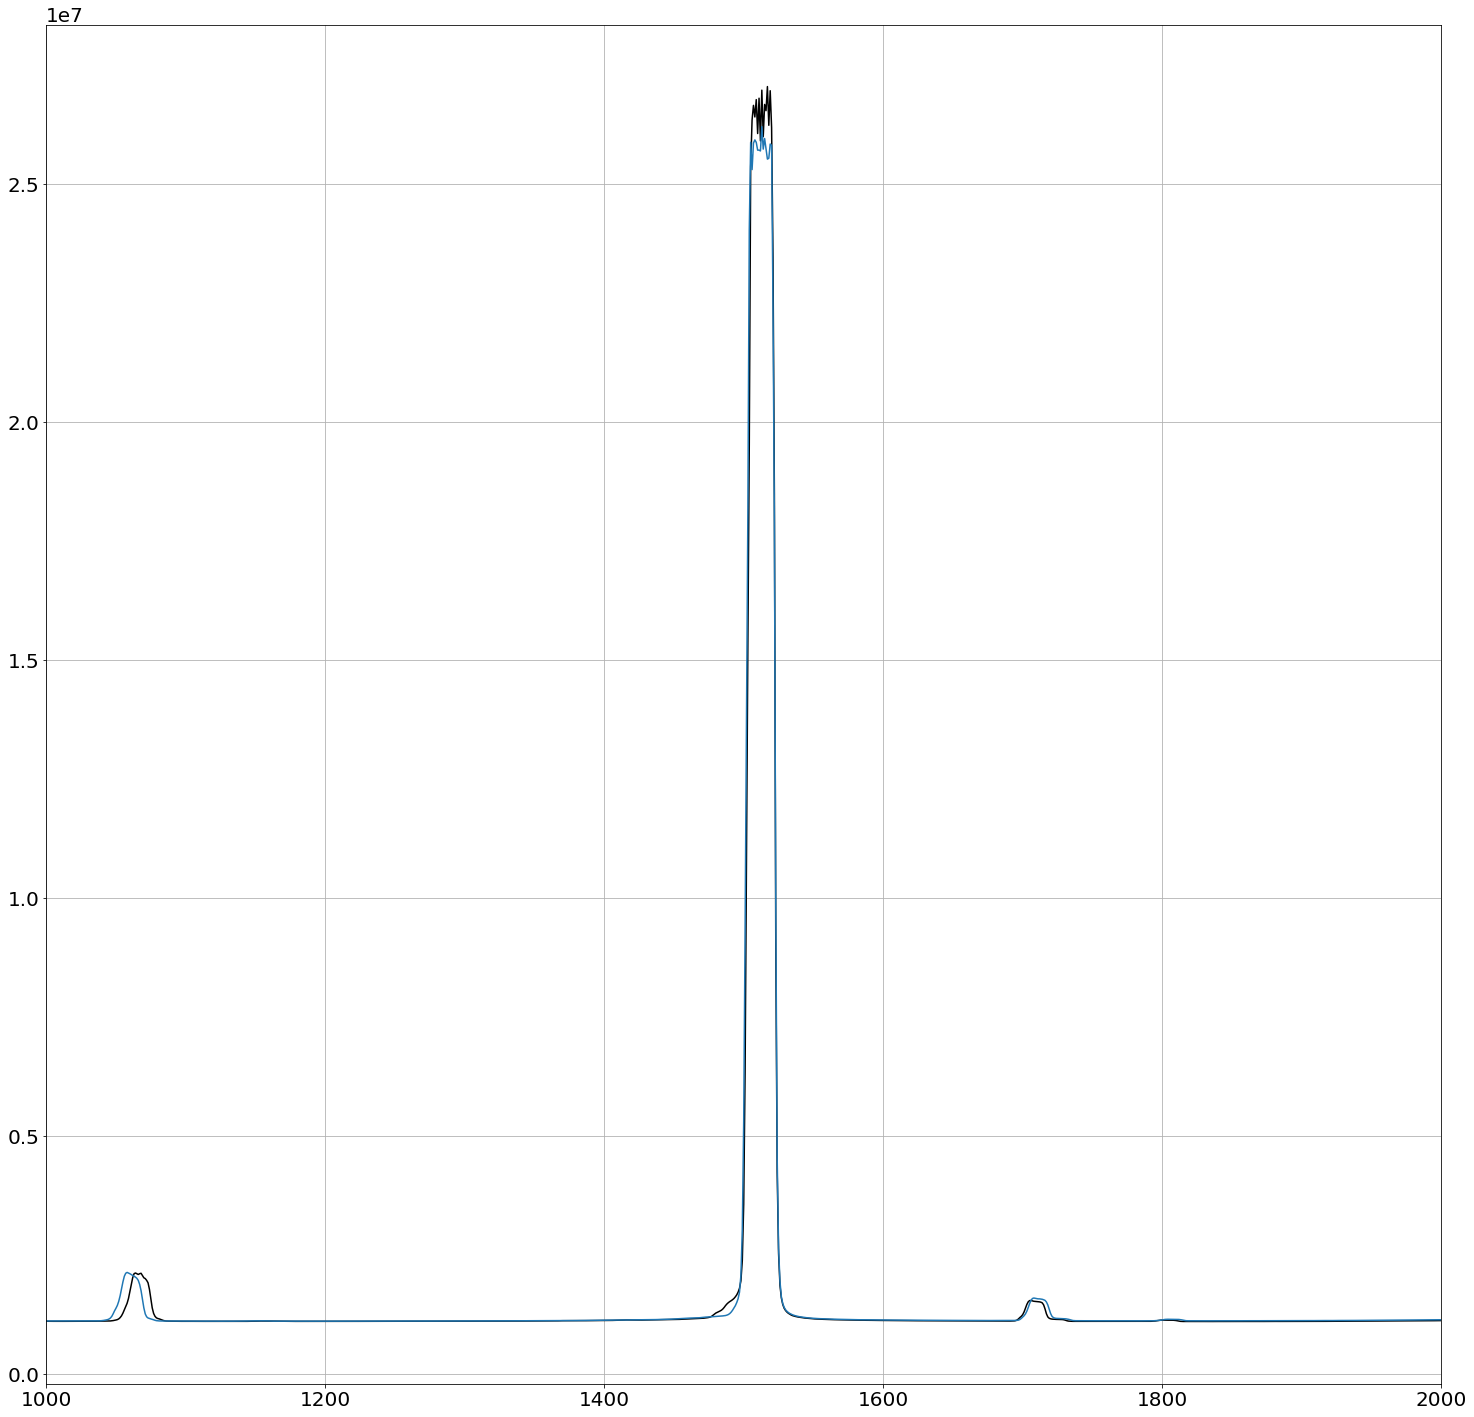

In [58]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([25, 25])

x = np.arange(2048)
fp = 're-Ne_490000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x, image_data.sum(axis=0), 'k')

fp = 're-Ne_495000.nc'
image_data = xr.open_dataset(join(specpath, fp)).to_array()[0]
plot(x + 978, image_data.sum(axis=0), 'C0')

grid()
xlim(1000, 2000)

# moter-to-sizeOfOverlap
I made a graph of the moter range and the size of the overlap.

[-8.35087719e-04  1.38529825e+03]


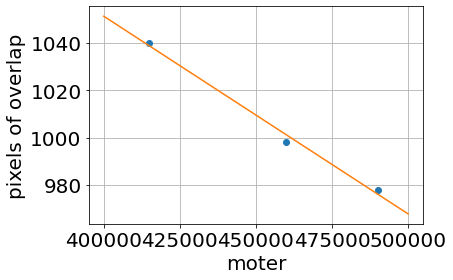

In [59]:
index = np.array([415000,460000, 490000])
overlap = np.array([1040, 998, 978])
plot(index, overlap, 'o')

fun = np.poly1d(np.polyfit(index, overlap, 1))
x = np.linspace(400000, 500000, 100)
plot(x, fun(x))

grid()

xlabel('moter')
ylabel('pixels of overlap')

print(fun.coef)

# Make an overlap spectrum
I estimated the size of overlap by the previous graph.<br>
By the function, I overlaid all the data.

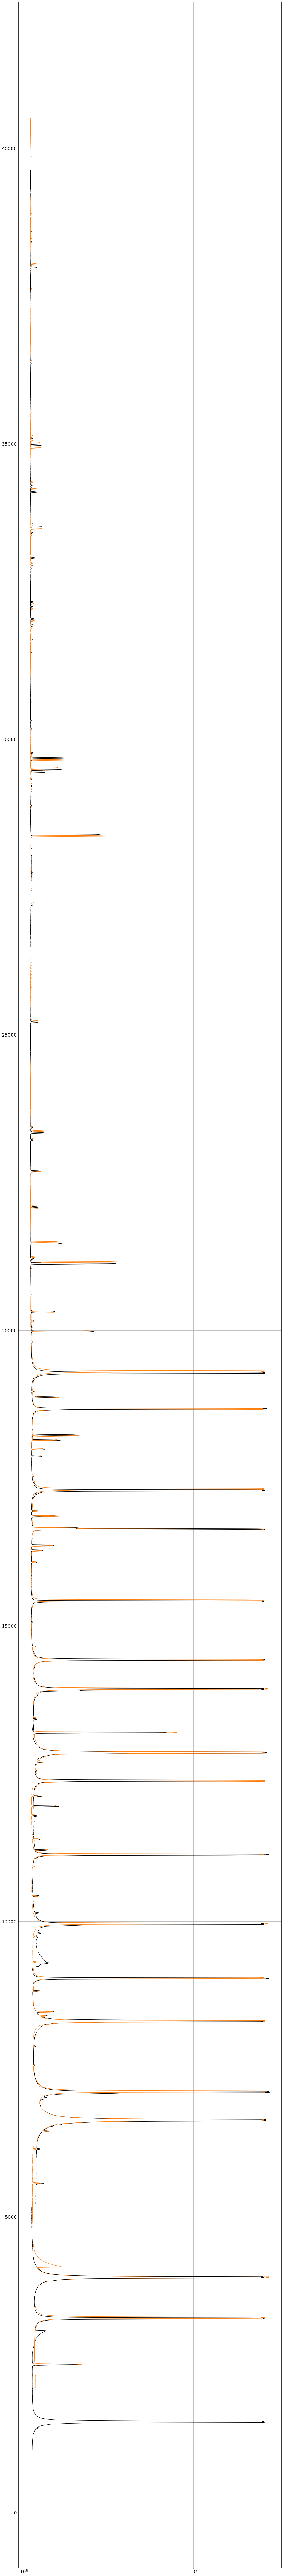

In [61]:
R = [f're-Ne_{410000 + 5000*i}.nc' for i in range(40)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,200])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = xr.open_dataset(join(specpath,fp)).to_array()[0]
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
xscale('log')
# axhline(2490)
# axhline(38780)
# axhline(47750)

# Convert pixels to wave length

In [ ]:
balmers = np.array([656.279, 486.135, 434.047])
rs = np.array([2490, 38780, 47750])
plot(rs/1e4, balmers, 'o')

func = np.poly1d(np.polyfit(rs, balmers, 2))
xp = np.linspace(0, 50000, 100)
plot(xp/1e4, func(xp))
grid()
ylim(400, 700)
xlim(0, 5)
xlabel('accumulated pixel number, $10^{4}$')
ylabel('wavelength, nm')